In [1]:
import cv2 as cv
import numpy as np
import random
from PIL import Image
from tensorflow.keras.utils import normalize
import keras
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

seed = 42
SIZE = 256
seg = keras.models.load_model('trial_2_lung_segmentation.h5')



In [10]:
def test_on_image1(img_array, img_num, img_side_size = 256):
    
    #pred = model.predict(img_array[img_num].reshape(1,img_side_size,img_side_size))
    pred = img_array[img_num]
    pred[pred>0.5] = 1
    pred[pred<0.5] = 0
    pred1 = pred.reshape(img_side_size, img_side_size)
    #cv.imwrite('pred1.jpg',pred1)
    #plt.imshow(pred1, cmap = 'gray')
    #plt.show()
    return pred1 

In [4]:
dire = "D:/Work/Lung Tuberculosis/Data sets/Lung Segmentation/t/Tuberculosis-185.png"

image_dataset = []
src = cv.imread(dire)
image = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
image = Image.fromarray(image)
image = image.resize((SIZE, SIZE))
image_dataset.append(np.array(image))

In [7]:
image_dataset.shape

(1, 256, 256, 1)

In [6]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)

In [8]:
pred = seg.predict(image_dataset)

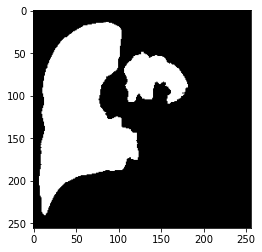

In [11]:
#test_on_image1(pred,0)
pred_mask = test_on_image1(pred,0)  
plt.imsave('pred_mask2.png',pred_mask, cmap = 'gray')
image =cv.imread('pred_mask2.png')
os.remove("pred_mask2.png")
plt.imshow(image)
plt.show()

uint8


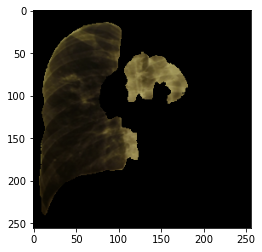

In [12]:
src = cv.resize(src,(256,256))

src2 = cv.resize(image, src.shape[1::-1])



print(src2.dtype)



dst = cv.bitwise_and(src, src2)

plt.imshow(dst,cmap = 'gray')
plt.show()